<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

#Load data

In [2]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro_without_nan.csv'

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
train_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
test_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
train_labels = df_train.Histology

In [0]:
test_labels = df_test.Histology

#Z score dei dati

In [0]:
mean = train_data.mean(axis=0)
train_data_stand = train_data - mean
std = train_data.std(axis=0)
train_data_stand /= std

In [0]:
test_data_stand = test_data - mean
test_data_stand /= std

##Vettorizzare i label

In [0]:
word_index={'adenocarcinoma':0, 'large cell':1, 'squamous cell carcinoma':2}

In [0]:
train_labels_dec = [word_index[label] for label in train_labels]

In [0]:
test_labels_dec = [word_index[label] for label in test_labels]

In [17]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
one_hot_train_labels = to_categorical(train_labels_dec)
one_hot_test_labels = to_categorical(test_labels_dec)

#PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=0.9, svd_solver='full')

In [21]:
pca.fit(train_data_stand)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [0]:
train_data_stand_pca = pca.transform(train_data_stand)
test_data_stand_pca = pca.transform(test_data_stand)

In [23]:
train_data_stand_pca.shape

(131, 9)

#Build cluster algorithm 

Possiamo descrivere
l’algoritmo k-means come un semplice problema di ottimizzazione, un
approccio iterativo per minimizzare il valore SSE (sum of squared
errors, ovvero la somma degli errori quadratici all’interno del cluster),
che viene anche chiamata inerzia del cluster.


In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=0, verbose=10)

In [41]:
kmeans.fit(train_data_stand_pca)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 7528.156844936935
start iteration
done sorting
end inner loop
Iteration 1, inertia 7326.297474598807
start iteration
done sorting
end inner loop
Iteration 2, inertia 7183.985477258478
start iteration
done sorting
end inner loop
Iteration 3, inertia 7061.921460140555
start iteration
done sorting
end inner loop
Iteration 4, inertia 6960.786048470479
start iteration
done sorting
end inner loop
Iteration 5, inertia 6943.297121050354
start iteration
done sorting
end inner loop
Iteration 6, inertia 6943.297121050354
center shift 0.000000e+00 within tolerance 1.072615e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 8108.119186465553
start iteration
done sorting
end inner loop
Iteration 1, inertia 7729.704390272361
start iteration
done sorting
end inner loop
Iteration 2, inertia 7408.86107581544
start iteration
done sorting
end inner loop
Iteration 3, inertia 73

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=10)

In [42]:
kmeans.labels_

array([2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0,
       1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1, 0,
       2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0,
       2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2],
      dtype=int32)

In [43]:
kmeans.labels_.shape

(131,)

In [0]:
label_predicted = kmeans.predict(train_data_stand_pca)

In [45]:
label_predicted

array([2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0,
       1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1, 0,
       2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0,
       2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2],
      dtype=int32)

In [46]:
print(f'Distortion: {kmeans.inertia_}')

Distortion: 6905.872804128035


#Metolo Elbow per trovare il numero ottimale di clusters

Non abbiamo bisogno di calcolare esplicitamente il valore SSE, in quanto
risulta già accessibile tramite l’attributo inertia_

Sulla base del valore SSE, possiamo utilizzare uno strumento grafico,
il cosiddetto metodo Elbow per stimare il numero ottimale di cluster k
per un determinato compito. Intuitivamente, possiamo dire che
aumentando k si riduce la distorsione. Questo perché i campioni saranno
più vicini ai centroidi ai quali sono stati assegnati. L’idea su cui si basa
il metodo Elbow è quella di identificare il valore di k in cui la
distorsione comincia a crescere più rapidamente.

Si deve tracciare il grafico della distorsione per più valori
di k 

##Train data

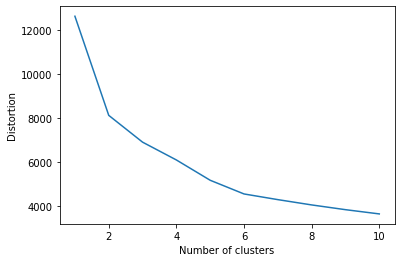

In [54]:
distortions = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, init='k-means++', random_state=0)
  km.fit(train_data_stand_pca)
  distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

il gomito è situato in k=2, quindi k=2 dovrebbe rapprensentare una buona scelta per questo dataset (purtroppo)

##Test data

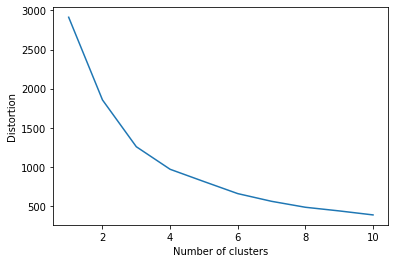

In [55]:
distortions = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, init='k-means++', random_state=0)
  km.fit(test_data_stand_pca)
  distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#Forse qui viene bene la divisione in 3 clusters

#Grafici a Silhouettes
